In [1]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

import os
from datetime import datetime
from pathlib import Path

import numpy as np
import torch
from dotenv import load_dotenv
from easydict import EasyDict
from torch.utils.data import DataLoader
from torchvision import models
from tqdm import tqdm
load_dotenv()



True

In [2]:
eval_transform = A.Compose([
    A.Normalize(mean=(0.485,), std=(0.229,)),
    ToTensorV2(),
])
wider_train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(border_mode=0, p=0.7, shift_limit=0.2, scale_limit=0.4),
    A.Normalize(mean=(0.485,), std=(0.229,)),
    ToTensorV2(),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']))

In [3]:
from src.dataset import CellDataset
config = EasyDict(
    dataset_path=Path(os.environ["dataset_path"]),
    weights_path=Path(os.environ["weights_path"]),
    val_size=0.2,
)
train_dataset=CellDataset(cfg=config, mode="train", transform=wider_train_transform)
val_dataset=CellDataset(cfg=config, mode="train", transform=eval_transform)

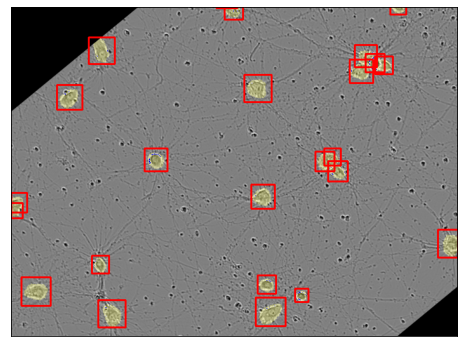

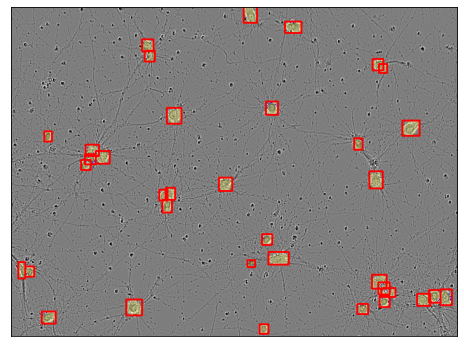

In [14]:
from src.visualization import plot_mask_bbox
from matplotlib import pyplot as plt
img, target = train_dataset[8]
plot_mask_bbox(img, target['boxes'], target['masks'], figure_scale=8)
# plt.imshow(img[0].numpy())
img, target = val_dataset[8]
plot_mask_bbox(img, target['boxes'], target['masks'], figure_scale=8)